In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


DATA PREPROCESSING

In [4]:
#CONVERTING DATE INTO DATETIME FORMAT
df['Date']=pd.to_datetime(df['Date'])

In [5]:
#SPLITTING DATA AS TRAIN AND VALIDATION
length_data=len(df)
split_ratio=0.7
train_data_len=int(length_data*split_ratio)
validation_data_len=int(length_data-train_data_len)
print(train_data_len)
print(validation_data_len)

1184
508


In [6]:
train_data=df.loc[:train_data_len-1,['Date','Open']]
validation_data=df.loc[train_data_len:,['Date','Open']]
print(train_data.shape)
print(validation_data.shape)

(1184, 2)
(508, 2)


In [7]:
#CONVERTING TRAIN DATA INTO ARRAY
train_data_array=train_data['Open'].values
train_data_array.shape
#CHANGING 1D ARRAY TO 2D ARRAY
train_data_array=train_data_array.reshape(-1,1)
train_data_array
print(train_data_array.shape)  # HAVING ONLY OPEN VALUES

(1184, 1)


In [8]:
#SCALING
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data_scaled=scaler.fit_transform(train_data_array)
train_data_scaled

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       ...,
       [0.634626  ],
       [0.64453278],
       [0.65410817]], shape=(1184, 1))

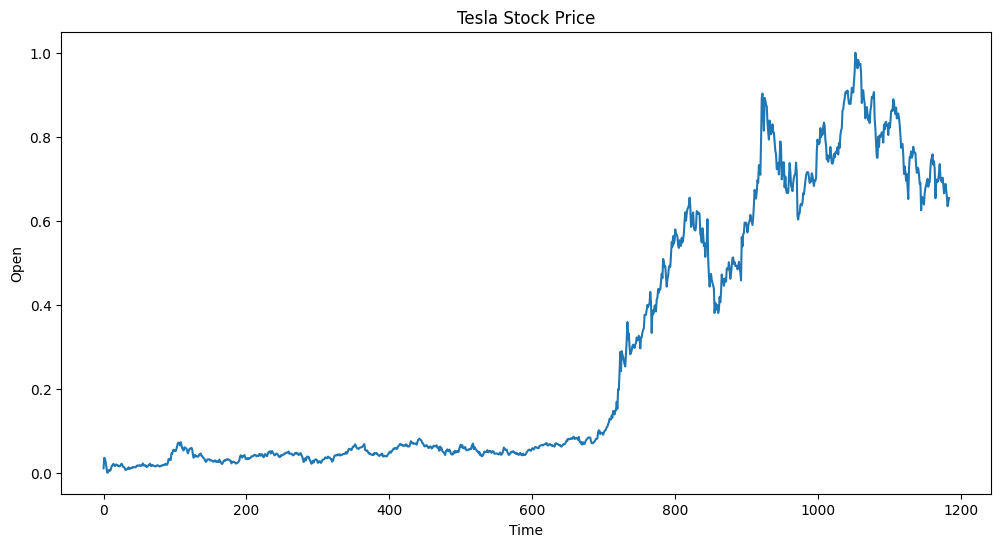

In [11]:
plt.figure(figsize=(12,6))
plt.plot(train_data_scaled)
plt.xlabel('Time')
plt.ylabel('Open')
plt.title('Tesla Stock Price')
plt.show()

In [12]:
#CREATING X_train and y_train from TRAINING DATA
X_train=[]
y_train=[]
for i in range(50,len(train_data_scaled)):
  X_train.append(train_data_scaled[i-50:i,0])
  y_train.append(train_data_scaled[i,0])

In [13]:
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1134, 50)
(1134,)


In [ ]:
print(X_train[0]) # LOOP IS RUNNING FROM 0 to 50, first 50 days OPEN PRICE
print(y_train[0]) # 51st DAY OPENING PRICE
print(X_train[1]) # LOOP IS RUNNING FROM 1 to 51, 2nd 50 days OPEN PRICE
print(y_train[1]) # 52nd DAY OPENING PRICE
#THIS WILL CONTINUE FOR THE ENTIRE DATASET, HENCE SHAPE OF X_train is 1184-50=1134

[0.01053291 0.03553936 0.03262991 0.02526425 0.01421574 0.00095754
 0.         0.00530328 0.00666594 0.00460354 0.00662911 0.01399478
 0.01679373 0.01926123 0.02102899 0.01664641 0.01605716 0.01859832
 0.01973999 0.01756712 0.0162413  0.01705153 0.01495231 0.01605716
 0.01789858 0.02139727 0.01988731 0.01458403 0.01384746 0.01292675
 0.00939123 0.0061135  0.00751299 0.00850735 0.01038559 0.01270578
 0.00883881 0.00924392 0.01086436 0.01145362 0.01112216 0.01381063
 0.01329503 0.0131109  0.01296358 0.01281627 0.0155784  0.01741981
 0.01646228 0.01664641]
0.017898577503111683
[0.03553936 0.03262991 0.02526425 0.01421574 0.00095754 0.
 0.00530328 0.00666594 0.00460354 0.00662911 0.01399478 0.01679373
 0.01926123 0.02102899 0.01664641 0.01605716 0.01859832 0.01973999
 0.01756712 0.0162413  0.01705153 0.01495231 0.01605716 0.01789858
 0.02139727 0.01988731 0.01458403 0.01384746 0.01292675 0.00939123
 0.0061135  0.00751299 0.00850735 0.01038559 0.01270578 0.00883881
 0.00924392 0.01086436 0.

In [15]:
#RESHAPING X_train and y_train
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1) #1134, 50, 1
y_train=y_train.reshape(y_train.shape[0],1) # 1134, 1
print(X_train.shape) # THERE ARE TOTAL 1134 records and EACH RECORD HAS 50 ROWS AND 1 COLUMN
print(y_train.shape)

(1134, 50, 1)
(1134, 1)


In [17]:
print(f'First 50 records:{X_train[0]}')
print(f'Result basis first 50 records:{y_train[0]}')

First 50 records:[[0.01053291]
 [0.03553936]
 [0.03262991]
 [0.02526425]
 [0.01421574]
 [0.00095754]
 [0.        ]
 [0.00530328]
 [0.00666594]
 [0.00460354]
 [0.00662911]
 [0.01399478]
 [0.01679373]
 [0.01926123]
 [0.02102899]
 [0.01664641]
 [0.01605716]
 [0.01859832]
 [0.01973999]
 [0.01756712]
 [0.0162413 ]
 [0.01705153]
 [0.01495231]
 [0.01605716]
 [0.01789858]
 [0.02139727]
 [0.01988731]
 [0.01458403]
 [0.01384746]
 [0.01292675]
 [0.00939123]
 [0.0061135 ]
 [0.00751299]
 [0.00850735]
 [0.01038559]
 [0.01270578]
 [0.00883881]
 [0.00924392]
 [0.01086436]
 [0.01145362]
 [0.01112216]
 [0.01381063]
 [0.01329503]
 [0.0131109 ]
 [0.01296358]
 [0.01281627]
 [0.0155784 ]
 [0.01741981]
 [0.01646228]
 [0.01664641]]
Result basis first 50 records:[0.01789858]


TRAINING THE LSTM MODEL

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense
model_lstm=Sequential()
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50,return_sequences=True)) # Changed to return sequences
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

c:\Users\lenovo\Desktop\PROJECTS\STOCK_PRICE_PREDICTION_LSTM\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:

#COMPILING THE MODEL
model_lstm.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [37]:
#importing tensorboard
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [38]:

#TRAINING THE MODEL
history_lstm=model_lstm.fit(X_train,y_train,epochs=50,batch_size=32,callbacks=[tensorboard_callback])

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 8.8183e-04 - loss: 0.0288
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 8.8183e-04 - loss: 0.0045
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 8.8183e-04 - loss: 0.0052
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 8.8183e-04 - loss: 0.0039
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 8.8183e-04 - loss: 0.0040
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 8.8183e-04 - loss: 0.0040
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 8.8183e-04 - loss: 0.0037
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 8.8183e-04 - loss: 0.0039
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 8.8183e-04 - loss: 0.0034
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 8.8183e-04 - loss: 0.0031
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 8.8183e-04 - loss: 0.0033
Epoch 12/50


In [39]:
#SAVING THE MODEL
model_lstm.save('model_lstm.h5')

In [40]:
#LOADING TENSORBOARD
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18048), started 0:11:14 ago. (Use '!kill 18048' to kill it.)

In [41]:
#MAKING PREDICTIONS FROM TRAINING DATA
y_pred_train=model_lstm.predict(X_train)
y_pred_train=scaler.inverse_transform(y_pred_train)
y_pred_train


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step


array([[ 20.226593],
       [ 20.401493],
       [ 20.573341],
       ...,
       [204.1973  ],
       [202.66531 ],
       [200.9694  ]], shape=(1134, 1), dtype=float32)

In [42]:
y_train=scaler.inverse_transform(y_train)
y_train

array([[ 21.      ],
       [ 20.75    ],
       [ 20.889999],
       ...,
       [188.460007],
       [191.149994],
       [193.75    ]], shape=(1134, 1))

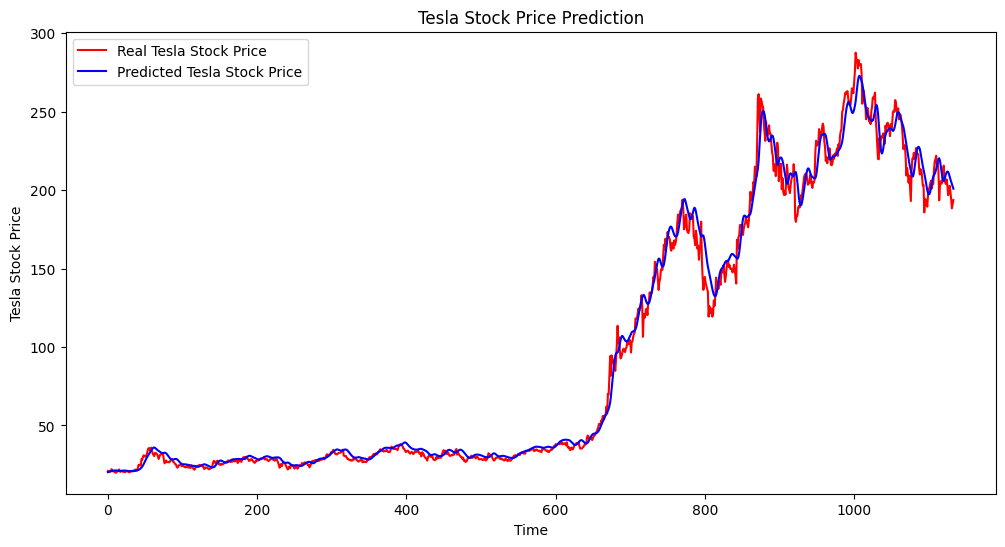

In [43]:
#VISUALIZATION 
plt.figure(figsize=(12,6))  
plt.plot(y_train,color='red',label='Real Tesla Stock Price')
plt.plot(y_pred_train,color='blue',label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [45]:
#CREATING TEST DATA FROM VALIDATION DATA
validation_data_array=validation_data['Open'].values
validation_data_array=validation_data_array.reshape(-1,1)
validation_data_array.shape

(508, 1)

In [46]:
#SCALING
validation_data_scaled=scaler.transform(validation_data_array)
validation_data_scaled.shape

(508, 1)

In [47]:
#CREATING X_test and y_test from VALIDATION DATA
X_test=[]
y_test=[]
for i in range(50,len(validation_data_scaled)):
  X_test.append(validation_data_scaled[i-50:i,0])
  y_test.append(validation_data_scaled[i,0])

In [48]:
#CONVERTING INTO ARRAY
X_test=np.array(X_test)
y_test=np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(458, 50)
(458,)


In [49]:
#RESHAPING
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_test=y_test.reshape(y_test.shape[0],1)
print(X_test.shape)
print(y_test.shape)

(458, 50, 1)
(458, 1)


In [51]:
#MAKING PREDICTIONS WITH TEST DATA
y_pred_test=model_lstm.predict(X_test)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_pred_test

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[243.92531],
       [243.30272],
       [242.80478],
       [242.54343],
       [242.74509],
       [243.42964],
       [244.27682],
       [244.959  ],
       [245.2701 ],
       [245.10771],
       [244.85771],
       [245.06683],
       [245.68117],
       [246.55815],
       [247.29335],
       [247.62024],
       [247.52693],
       [247.26718],
       [247.64969],
       [248.96179],
       [250.954  ],
       [252.99887],
       [255.00719],
       [256.79065],
       [258.32446],
       [259.08652],
       [259.10602],
       [259.0121 ],
       [259.76904],
       [261.50348],
       [263.54407],
       [264.20496],
       [262.95367],
       [260.43362],
       [257.55682],
       [255.08186],
       [253.7399 ],
       [253.56271],
       [254.77591],
       [257.24213],
       [260.03696],
       [261.7657 ],
       [262.43146],
       [262.21368],
       [261.14676],
       [259.11014],
       [256.95078],
       [255.22868],
       [254.53287],
       [254.87274],


In [52]:
y_test=scaler.inverse_transform(y_test)
y_test

array([[247.679993],
       [248.509995],
       [247.029999],
       [251.      ],
       [251.410004],
       [248.919998],
       [248.199997],
       [247.5     ],
       [246.      ],
       [250.850006],
       [255.399994],
       [251.899994],
       [253.259995],
       [250.210007],
       [249.699997],
       [250.130005],
       [252.169998],
       [262.      ],
       [262.399994],
       [262.149994],
       [260.320007],
       [266.980011],
       [266.450012],
       [268.890015],
       [261.950012],
       [264.799988],
       [271.109985],
       [280.200012],
       [278.880005],
       [275.      ],
       [259.320007],
       [259.079987],
       [262.220001],
       [262.25    ],
       [262.100006],
       [266.73999 ],
       [264.220001],
       [272.5     ],
       [275.      ],
       [270.049988],
       [261.269989],
       [269.649994],
       [267.380005],
       [262.429993],
       [255.75    ],
       [264.269989],
       [262.690002],
       [267.6

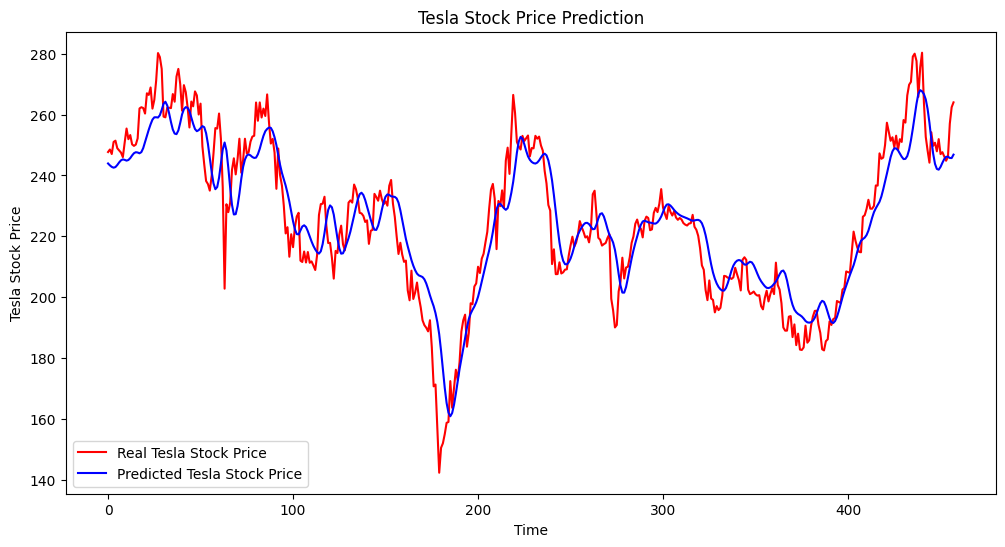

In [53]:
#VISUALIZATION
plt.figure(figsize=(12,6))
plt.plot(y_test,color='red',label='Real Tesla Stock Price')
plt.plot(y_pred_test,color='blue',label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

FUTURE PREDICTIONS

In [54]:
#LAST RECORD OF DATASET
last_index=df.index[-1]
last_index
input_df=df.loc[last_index,:]
input_df['Open'] #Last record of opening day price 17/03/2017, we will predict price for 18/03/2017

np.float64(264.0)

In [55]:
#GETTING LAST 50 DAY RECORDS
df.index[-50:]
input_df=df.loc[df.index[-50:],'Open']
#SCALING
input_df=scaler.transform(input_df.values.reshape(-1,1))
input_df.shape

(50, 1)

In [56]:
#RESHAPING
input=np.reshape(input_df,(1,50,1))
input.shape 

(1, 50, 1)

In [59]:
#MAKING PREDICTIONS
prediction=model_lstm.predict(input)
prediction=scaler.inverse_transform(prediction)
print(f'Predicted Price for 18/03/2017:{prediction[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted Price for 18/03/2017:249.18789672851562


In [61]:
#SAVING THE SCALED OBJECT PICKLE FILE
import pickle
with open('scaled.pickle','wb') as file:
    pickle.dump('scaler',file)